# Read the dataset

In [16]:
import pandas as pd
df=pd.read_csv('IMDB Dataset.csv')

# EDA

In [17]:
print(df.shape)

(50000, 2)


In [18]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [19]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [20]:
p = df[df['sentiment']=='positive'] 
n = df[df['sentiment']=='negative']

new = pd.concat([p,n],axis=0)
new.shape

new['sentiment'].value_counts()

df = new

In [21]:
df.head(1)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive


In [22]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


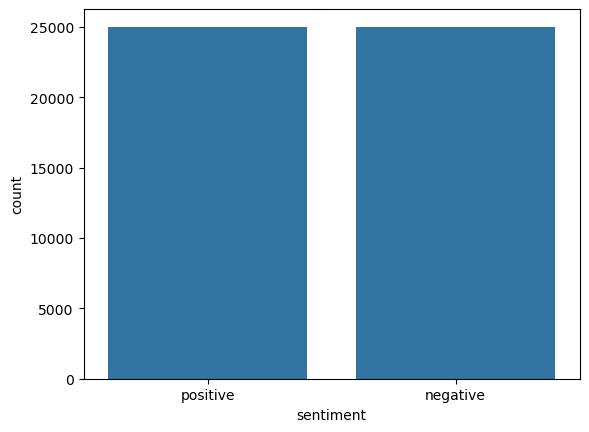

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='sentiment',data=df)
plt.show()

In [24]:
positive_review=list(df[df['sentiment']=='positive']['review'])
negative_review=list(df[df['sentiment']=='negative']['review'])

In [25]:
print(len(positive_review))

25000


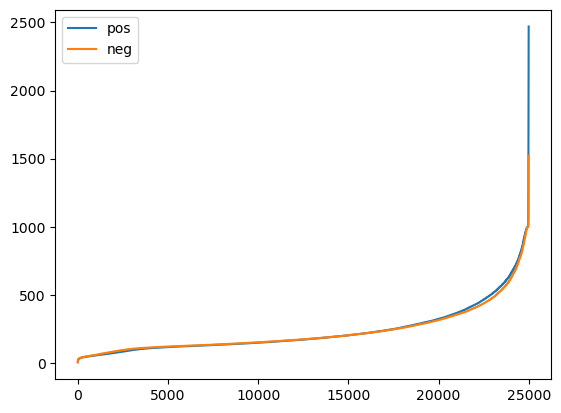

In [26]:
# word count

charlen_pos = []
for i in positive_review:
    charlen_pos.append(len(i.split()))

charlen_neg = []
for i in negative_review:
    charlen_neg.append(len(i.split()))

import matplotlib.pyplot as plt
charlen_pos.sort()
charlen_neg.sort()
plt.plot(range(len(charlen_pos)),charlen_pos)
plt.plot(range(len(charlen_neg)),charlen_neg)
plt.legend(['pos','neg'])
plt.show()

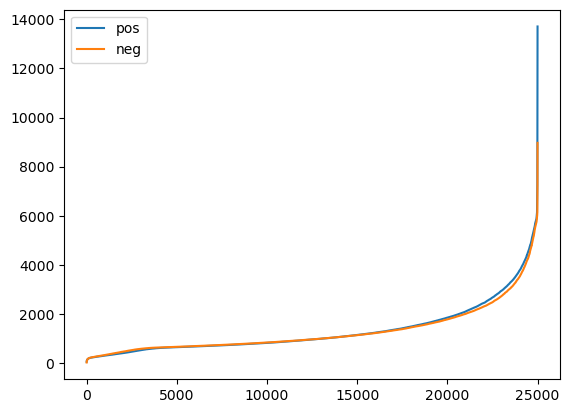

In [27]:
 # word count

charlen_pos = []
for i in positive_review:
    charlen_pos.append(len(i))

charlen_neg = []
for i in negative_review:
    charlen_neg.append(len(i))

import matplotlib.pyplot as plt
charlen_pos.sort()
charlen_neg.sort()
plt.plot(range(len(charlen_pos)),charlen_pos)
plt.plot(range(len(charlen_neg)),charlen_neg)
plt.legend(['pos','neg'])
plt.show()

In [28]:
!pip install wordcloud

In [29]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt 
stopwords=set(STOPWORDS)

In [30]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud)
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

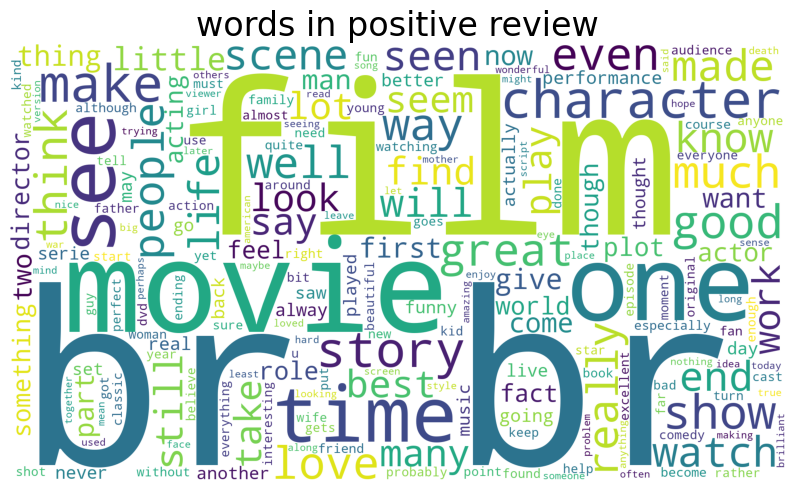

In [31]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

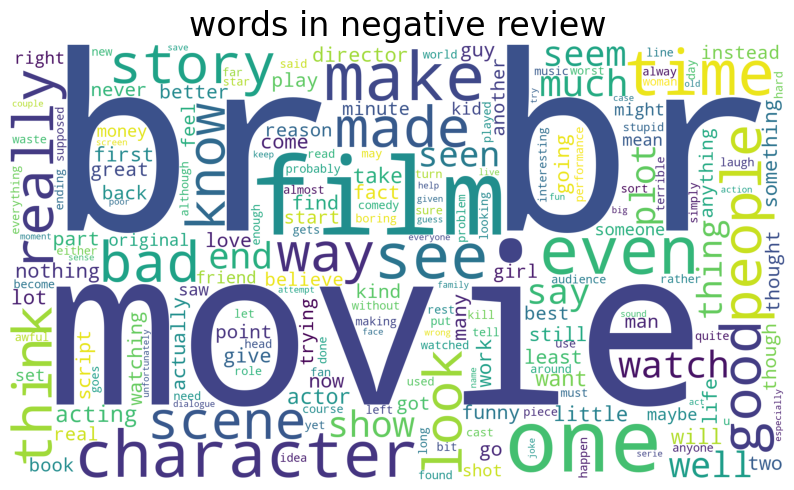

In [32]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

In [33]:
import pandas as pd
from tqdm import tqdm
from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer
from wordcloud import STOPWORDS

# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Text preprocessing function
def text_processing(data, colum_name):
    def decontracted(phrase):
        # Specific replacements
        phrase = re.sub(r'<br /><br />', ' ', phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # General replacements
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase

    stopwords = set(STOPWORDS)

    # Combining all the above steps
    preprocessed_reviews = []
    for sentence in tqdm(data[colum_name].values):
        sentence = re.sub(r"http\S+", "", sentence)  # Remove URLs
        sentence = BeautifulSoup(sentence, 'lxml').get_text()  # Remove HTML tags
        sentence = decontracted(sentence)  # Replace contractions
        sentence = re.sub("\S*\d\S*", "", sentence).strip()  # Remove numbers
        sentence = ' '.join(e.lower() for e in sentence.split() if e not in stopwords)  # Remove stopwords and lowercase
        preprocessed_reviews.append(sentence.strip())

    # Stemming
    porter = PorterStemmer()
    list_of_sentence = []
    for sentence in preprocessed_reviews:
        words_in_sentence = []
        for words in sentence.split():
            words_in_sentence.append(porter.stem(words))  # Stem each word
        list_of_sentence.append(' '.join(words_in_sentence))  # Rejoin words into a sentence

    return list_of_sentence

# Apply text preprocessing
df['preprocessed_review'] = text_processing(df, 'review')

# Save the DataFrame to a CSV file
df.to_csv('preprocessed_imdb_reviews.csv', index=False)

print("Preprocessed data saved to 'preprocessed_imdb_reviews.csv'")

  2%|▏         | 760/50000 [00:00<00:12, 3852.62it/s]C:\Users\tasin\AppData\Local\Temp\ipykernel_17648\832813883.py:37: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, 'lxml').get_text()  # Remove HTML tags
100%|██████████| 50000/50000 [00:12<00:00, 4108.90it/s]


Preprocessed data saved to 'preprocessed_imdb_reviews.csv'


# Cleaning 

In [34]:

from tqdm import tqdm
def text_processing(data,colum_name):
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above sentence,
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data[colum_name].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip())
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list_of_sentence=[]
    for  sentence in preprocessed_reviews:
        words_in_sentence=[]
        for words in sentence.split():
            words_in_sentence.append(porter.stem(words))

        list_of_sentence.append(' '.join(words_in_sentence))
    return(list_of_sentence)

In [35]:
x=text_processing(df,'review')

  2%|▏         | 830/50000 [00:00<00:11, 4105.91it/s]C:\Users\tasin\AppData\Local\Temp\ipykernel_17648\986484085.py:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentance = BeautifulSoup(sentance, 'lxml').get_text()
100%|██████████| 50000/50000 [00:12<00:00, 4142.60it/s]


In [36]:
df = df

In [37]:
df['cleaned_review']=x

In [38]:
df.head()

,review,sentiment,preprocessed_review,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...,one review mention watch oz episod will hooked...
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...,a wonder littl production. the film techniqu u...
2,I thought this was a wonderful way to spend ti...,positive,i thought wonder way spend time hot summer wee...,i thought wonder way spend time hot summer wee...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...,basic famili littl boy (jake) think zombi clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,petter mattei love time money visual stun film...


In [39]:
X = df['cleaned_review']
Y = df['sentiment']

In [40]:
Y = list(Y)
for i in range(len(Y)):
    if Y[i]=='positive':
        Y[i]=1
    else:
        Y[i]=0
        
df['sentiment_score']=Y

Y=df['sentiment_score']

# Prepare the data for the ML model

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35000,) (15000,) (35000,) (15000,)


In [43]:
print(y_train.value_counts())

sentiment_score
1    17540
0    17460
Name: count, dtype: int64


# BOW

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)
print('The top words used',vectorizer.get_feature_names_out())
print('type of bow',type(X_train_bow))
print('Matrix representation',X_train_bow.toarray()[:1])
print('shape',X_train_bow.shape,X_test_bow.shape)

The top words used ['aaron' 'abandon' 'abbey' ... 'zorro' 'zu' 'zucco']
type of bow <class 'scipy.sparse._csr.csr_matrix'>
Matrix representation [[0 0 0 ... 0 0 0]]
shape (35000, 10000) (15000, 10000)


In [45]:
print('Before smote traning',list(y_train).count(1),list(y_train).count(0))
print('Before smote test',list(y_test).count(1),list(y_test).count(0))

Before smote traning 17540 17460
Before smote test 7460 7540


In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_bow, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_bow, y_test)

In [47]:
print('After smote traning',list(y_train_resampled).count(1),list(y_train_resampled).count(0))
print('After smote test',list(y_test_resampled).count(1),list(y_test_resampled).count(0))

After smote traning 17540 17540
After smote test 7540 7540


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  # f1_score

accuracy_train_list = []
accuracy_test_list = []
# f1_train_list =[]
# f1_test_list=[]

for i in range(61,71,4):
    
    print('K',i)
    
    # initialization
    neigh = KNeighborsClassifier(n_neighbors=i)
    
    # Training
    neigh.fit(X_train_resampled, y_train_resampled)
    
    # Test the training data
    y_pred_train = neigh.predict(X_train_bow)
    accuracy_train = accuracy_score(y_pred_train,y_train)
    accuracy_train_list.append(accuracy_train)
    # f1_train = f1_score(y_pred_train,y_train)
    # f1_train_list.append(f1_train)
   
    # Test the test data
    y_pred_test = neigh.predict(X_test_bow)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    accuracy_test_list.append(accuracy_test)
    # f1_test = f1_score(y_pred_test,y_test)
    # f1_test_list.append(f1_test)
   
    print(accuracy_train,accuracy_test)
    # print(f1_train,f1_test)
    print()
    



K 61
0.5936285714285714 0.5843333333333334

K 65


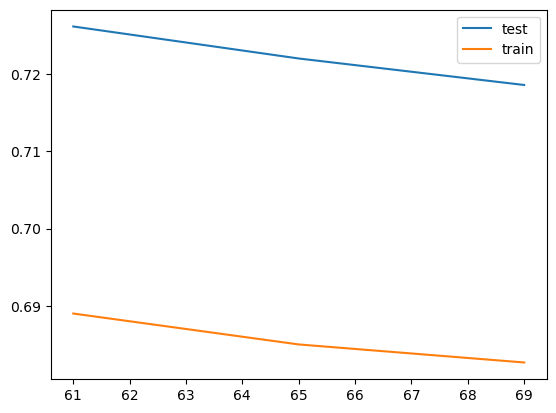

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(61,71,4)),accuracy_train_list)
plt.plot(list(range(61,71,4)),accuracy_test_list)
plt.legend(['test','train'])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
    
# initialization
neigh = KNeighborsClassifier(n_neighbors=65)

# Training
neigh.fit(X_train_resampled, y_train_resampled)

# Test the training data
y_pred_train = neigh.predict(X_train_bow)
accuracy_train = accuracy_score(y_pred_train,y_train)
f1_train = f1_score(y_pred_train,y_train)


# Test the test data
y_pred_test = neigh.predict(X_test_bow)
accuracy_test = accuracy_score(y_pred_test,y_test)
f1_test = f1_score(y_pred_test,y_test)


print(accuracy_train,accuracy_test)
print(f1_test,f1_test)

0.722 0.685
0.7323704333050127 0.7323704333050127


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Postive', 'Negative']
# print(classification_report(y_pred_test, y_test, target_names=target_names))
print(classification_report(y_pred_train, y_train, target_names=target_names))

              precision    recall  f1-score   support

     Postive       0.56      0.83      0.67      4690
    Negative       0.89      0.67      0.76      9310

    accuracy                           0.72     14000
   macro avg       0.72      0.75      0.71     14000
weighted avg       0.78      0.72      0.73     14000



In [ ]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_train, y_train)
c

array([[3894,  796],
       [3096, 6214]], dtype=int64)

<Axes: >

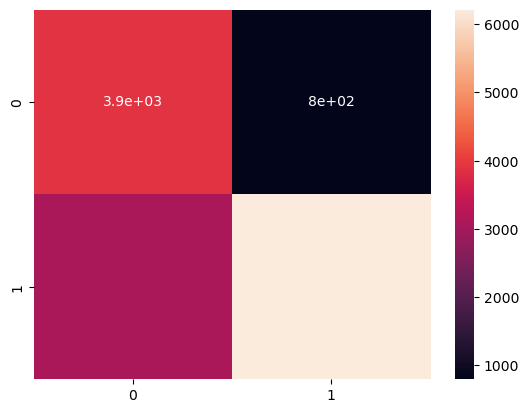

In [ ]:
import seaborn as sns
sns.heatmap(c, annot=True)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':list(range(10,30,2))}
neigh = KNeighborsClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train_bow, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 12, 14, 16, 18, 20, 22, 24, 26,
                                         28]})

In [ ]:
clf.best_params_

{'n_neighbors': 20}

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10, p=2)
neigh.fit(X_train_bow, y_train)

y_pred_train = clf.predict(X_train_bow)
f1_train = f1_score(y_pred_train,y_train)
print(f1_train)
print(classification_report(y_pred_train, y_train, target_names=target_names))

0.7535233322893831
              precision    recall  f1-score   support

     Postive       0.58      0.80      0.67      5045
    Negative       0.86      0.67      0.75      8955

    accuracy                           0.72     14000
   macro avg       0.72      0.74      0.71     14000
weighted avg       0.76      0.72      0.72     14000



In [ ]:
y_pred_test = clf.predict(X_test_bow)
f1_test = f1_score(y_pred_test,y_test)
print(f1_test)
print(classification_report(y_pred_test, y_test, target_names=target_names))

0.6961677512653651
              precision    recall  f1-score   support

     Postive       0.50      0.72      0.59      2075
    Negative       0.81      0.61      0.70      3925

    accuracy                           0.65      6000
   macro avg       0.65      0.67      0.64      6000
weighted avg       0.70      0.65      0.66      6000

